# Edge detection

You use the canny edge detection process:
* Apply gaussian filter to smooth the image in order to remove the noise.
* Find the intensity gradients of the image.
* Apply non maximum suppression to get rid of spurious response to edge detection
* Track edge by hysteresis: Finalize the detection of the edges by suppressing all the other edges that are weak and not connected to strong edges.

In [1]:
# import the necessary libraries
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

In [7]:
# Import the image
img = cv2.imread('../DATA/sammy_face.jpg')

In [8]:
# Run edge detector
edges = cv2.Canny(image=img, threshold1=127, threshold2=127)


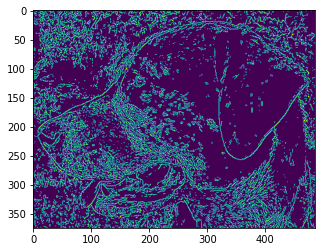

In [10]:
plt.imshow(edges)

You realize that it picks up the edges but then finds alot of noise. To reduce that, you could either introduce a blur or play around with the threshold values.





In [11]:
median_val = np.median(img)

In [13]:
# Lower and Upper Threshold
lower = int(max(0, 0.7*median_val))
upper = int(min(255, 1.3*median_val))

In [14]:
# Blur the image
blurred_img = cv2.blur(img, ksize=(5,5))


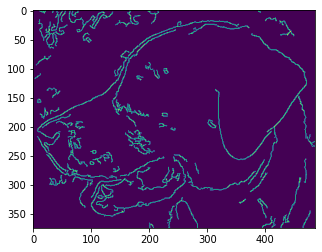

In [18]:
edges = cv2.Canny(image=blurred_img, threshold1=lower, threshold2=upper+70)

plt.imshow(edges)

# Grid Detection

In [19]:
# Import image
flat_chess = cv2.imread('../DATA/flat_chessboard.png')

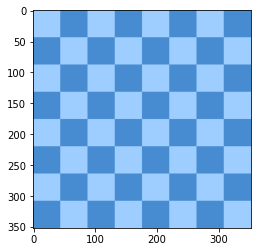

In [20]:
plt.imshow(flat_chess)

In [21]:
found, corners = cv2.findChessboardCorners(flat_chess, (7,7))

In [23]:
# Draw
cv2.drawChessboardCorners(flat_chess, (7,7), corners, found)

array([[[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       [[158, 206, 255],
        [158, 206, 255],
        [158, 206, 255],
        ...,
        [ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209]],

       ...,

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]],

       [[ 71, 139, 209],
        [ 71, 139, 209],
        [ 71, 139, 209],
        ...,
        [158, 206, 255],
        [158, 206, 255],
        [158, 206, 255]]

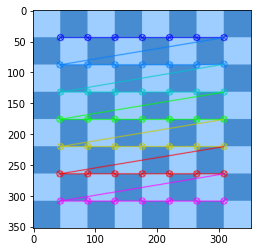

In [24]:
plt.imshow(flat_chess)

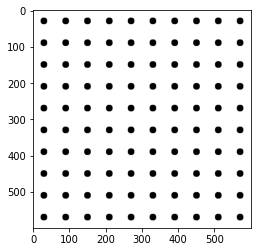

In [25]:
dots = cv2.imread('../DATA/dot_grid.png')
plt.imshow(dots)

In [26]:
found, corners = cv2.findCirclesGrid(dots, (10,10), cv2.CALIB_CB_SYMMETRIC_GRID)

In [27]:
cv2.drawChessboardCorners(dots, (10,10), corners, found)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

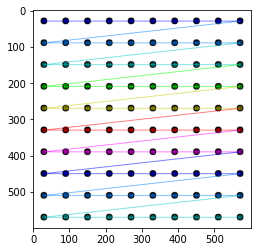

In [28]:
plt.imshow(dots)

# Contour Detection

In [29]:
# import the necessary libraries
import cv2
import numpy as np 
import matplotlib.pyplot as plt 


In [32]:
img = cv2.imread('../DATA/internal_external.png', 0)

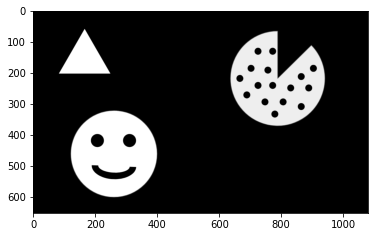

In [33]:
plt.imshow(img, cmap='gray')

In [36]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [37]:
type(contours)

list

In [38]:
external_contours = np.zeros_like(img)

In [40]:
for i in range(len(contours)):
    # External contours
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(external_contours, contours, i, 255, -1)
        

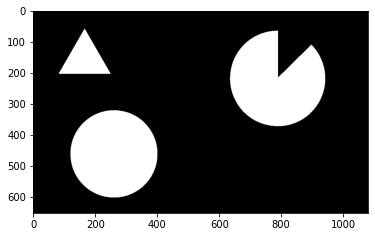

In [41]:
plt.imshow(external_contours, cmap='gray')

In [42]:
internal_contours = np.zeros_like(external_contours)


for i in range(len(contours)):
    # internal contours
    if hierarchy[0][i][3] != -1:
        cv2.drawContours(internal_contours, contours, i, 255, -1)

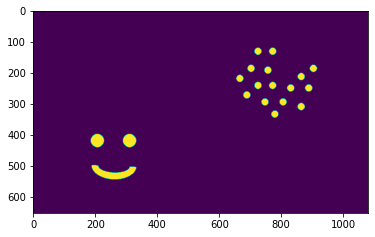

In [43]:
plt.imshow(internal_contours)

# Feature Matching

A more robust way compared to template matching. Can be done in three ways:
* Brute Force Matching with ORB descriptors
* Brute Force Matching with SIFT descriptorsand ratio tests
* FLANN based matcher

In [44]:
# import the necessary modules
import cv2
import numpy as np 
import matplotlib.pyplot as plt 


In [45]:
def display_image(image, cmap='gray'):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    ax.imshow(image, cmap=cmap)

In [47]:
# import image
image_logo = cv2.imread('../DATA/reeses_puffs.png', 0)

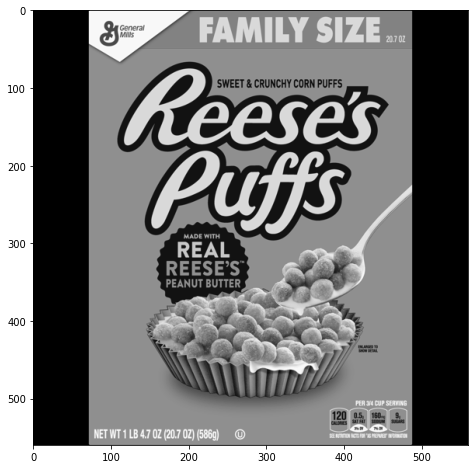

In [48]:
display_image(image_logo)

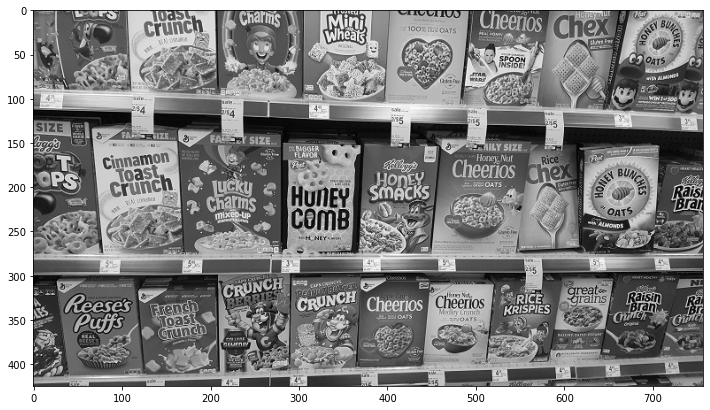

In [50]:
cereals = cv2.imread('../DATA/many_cereals.jpg', 0)

display_image(cereals)

In [51]:
# Brute force

orb = cv2.ORB_create()


In [53]:
kpts1, desc1 = orb.detectAndCompute(image_logo, None)
kpts2, desc2 = orb.detectAndCompute(cereals, None)

In [54]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

In [55]:
matches = bf.match(desc1, desc2)

In [56]:
matches = sorted(matches, key=lambda x:x.distance)

In [57]:
logo_matches = cv2.drawMatches(image_logo, kpts1, cereals, kpts2, matches[:25], None, flags=2)

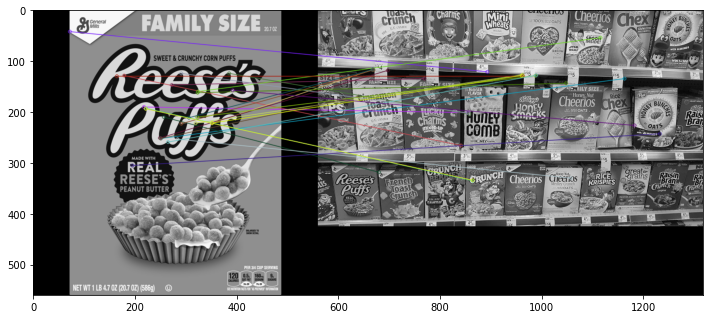

In [58]:
display_image(logo_matches)

In [59]:
# With BF and SIFT

In [61]:
# create a sift object
sift = cv2.SIFT_create()

In [62]:
kps1, desc1 = sift.detectAndCompute(image_logo, None)
kps2, desc2 = sift.detectAndCompute(cereals, None)

In [63]:
bf = cv2.BFMatcher()

In [64]:
matches = bf.knnMatch(desc1, desc2, k=2)

In [65]:
good = []

for match1, match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [66]:
sift_matches = cv2.drawMatchesKnn(image_logo, kps1, cereals, kps2, good, None, flags=2)

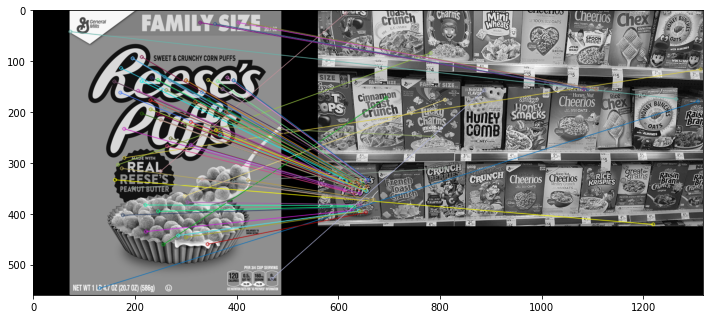

In [67]:
display_image(sift_matches)

In [68]:
# Flann

In [82]:
# create a sift object
sift = cv2.SIFT_create()

In [83]:
kps1, desc1 = sift.detectAndCompute(image_logo, None)
kps2, desc2 = sift.detectAndCompute(cereals, None)

In [84]:
# FLANN parameters
flann_index_tree = 0
index_params = dict(algorithm = flann_index_tree, trees=5)
search_params = dict(checks=50)

In [85]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [86]:
matches = flann.knnMatch(desc1, desc2, k=2)

In [89]:
matchesMask = [[0,0] for i in range(len(matches))]

In [90]:
good = []

for i, (match1, match2) in enumerate(matches):
    if match1.distance < 0.7* match2.distance:
        matchesMask[i] = [1, 0]

In [91]:
draw_params = dict(matchColor = (0, 255, 0), singlePointColor = (255,0,0), matchesMask = matchesMask, flags=0)

In [92]:
draw_params

{'matchColor': (0, 255, 0),
 'singlePointColor': (255, 0, 0),
 'matchesMask': [[0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [1, 0],
  [1, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [0, 0],
  [

In [93]:
flann_matches = cv2.drawMatchesKnn(image_logo, kps1, cereals, kps2, matches, None, **draw_params)

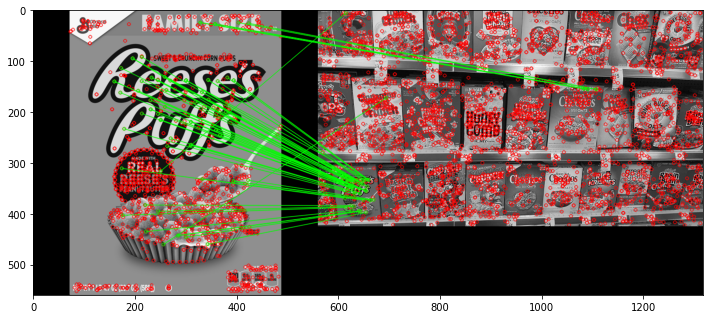

In [94]:
display_image(flann_matches)